# Doctor Consultation Fee Prediction

## Data Description

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. Here we have data that contains details about a doctor and we have to build a model to predict the doctor's consulting fee.


Size of training set: 5961 records


Size of test set: 1987 records



FEATURES:


Qualification: Qualification and degrees held by the doctor


Experience: Experience of the doctor in number of years


Rating: Rating given by patients


Profile: Type of the doctor


Miscellaneous_Info: Extra information about the doctor


Fees: Fees charged by the doctor (Target Variable)


Place: Area and the city where the doctor is located.



## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')





## Loading the Train Dataset

In [2]:
df=pd.read_excel("Final_Train.xlsx")
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
# Checking the dimension of the dataset
df.shape

(5961, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [6]:
# Statistical summary
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [7]:
# Checking the null values in the dataset
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

* we can see that the column "Rating" contains 3302 null values,25 null values in the column "Place" and 2620 null values in the column "Miscellaneous_info".

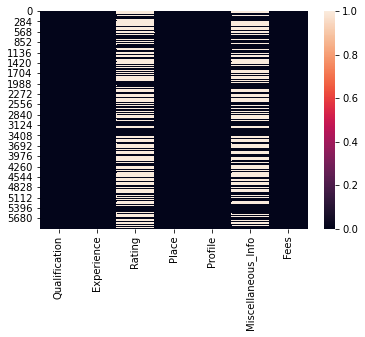

In [8]:
sns.heatmap(df.isnull())
plt.show()

## EDA

 Now we are going to extract years experience from the column Experience and converting to numaric.

In [9]:
df['Experience']=df['Experience'].str.split().str[0]
df['Experience']=df['Experience'].astype(int)

In [10]:
df.head(3)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300


Now we are going to replace the null values in the column "Place"

In [11]:
df['Place'].fillna('Unknown,Unknown',inplace=True)

Now we will extract locality and city from the column "Place"

In [12]:
df['Locality']=df['Place'].str.split(',').str[0]
df['City']=df['Place'].str.split(',').str[1]

#Remove the column Place
df.drop('Place',axis=1,inplace=True)

In [13]:
df.head(2)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore


In the column Rating  more than 50% of the values are null values so we are not replacing it with mode.we will assign a specicial value -99% to give them a special importance.

In [14]:
df['Rating'].fillna('-99%',inplace=True)

# convert Rating  from object to numeric
df['Rating']=df['Rating'].str.slice(stop=-1).astype(int)

In [15]:
df.head(2)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City
0,"BHMS, MD - Homeopathy",24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore


In [16]:
print("0-9%",len(df[(df['Rating']>0) & (df['Rating']<10)]))
print("10-19%",len(df[(df['Rating']>=10) & (df['Rating']<20)]))
print("20-29%",len(df[(df['Rating']>=20) & (df['Rating']<30)]))
print("30-39%",len(df[(df['Rating']>=30) & (df['Rating']<40)]))
print("40-49%",len(df[(df['Rating']>=40) & (df['Rating']<50)]))
print("50-59%",len(df[(df['Rating']>=50) & (df['Rating']<60)]))
print("And so on...")



0-9% 1
10-19% 0
20-29% 0
30-39% 3
40-49% 4
50-59% 12
And so on...


Now we are going to create bins of size 10(10 groups).Null values falls under the group 0. 0-9%  will be class 1,10-19% will be class 2 and so on.

In [17]:
bins=[-99,0,10,20,30,40,50,60,70,80,90,100]
labels=[i for i in range(11)]
df['Rating']=pd.cut(df['Rating'],bins=bins,labels=labels,include_lowest=True)


In [18]:
df['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [19]:
df

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City
0,"BHMS, MD - Homeopathy",24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,10,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Basavanagudi,Bangalore
5957,MBBS,33,0,General Medicine,NaN,100,Nungambakkam,Chennai
5958,MBBS,41,10,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Greater Kailash Part 2,Delhi
5959,"MBBS, MD - General Medicine",15,9,General Medicine,General Medical Consultation Viral Fever Treat...,100,Vileparle West,Mumbai


In [20]:
df['City'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'Unknown',
       ' Sector 5', nan], dtype=object)

In [21]:
import re
df['City']=df['City'].apply(lambda x: re.sub(' +','',str(x)))

In [22]:
df['City'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Unknown                 25
nan                      1
Sector5                  1
Name: City, dtype: int64

In [23]:
#City contains some improper data
df[(df['City']=='nan') | (df['City']=='Sector5')]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City
2169,BDS,11,0,Dentist,NaN,250,Dwarka,Sector5
3980,BDS,23,0,Dentist,NaN,250,e,nan


The locality Dwaraka is in the City Delhi,so we have to replace Sector5 with Delhi.

And where the City is nan,locality is marked as e.so we have to impute "unknown" to both of them.

In [24]:
df['City']=np.where(df['City']=='Sector5','Delhi',df['City'])

df['Locality'].loc[3980]='Unknown'
df['City'].loc[3980]='Unknown'

In [25]:
df.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City
0,"BHMS, MD - Homeopathy",24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


## Data Visualization

### Univariate Analysis

In [26]:
df['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

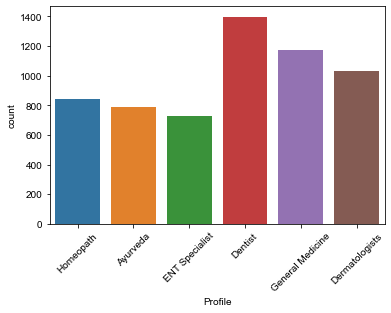

<Figure size 576x576 with 0 Axes>

In [27]:

plt.xticks(rotation=45)
sns.countplot(df['Profile'])
plt.figure(figsize=(8,8))
sns.set(font_scale=1)
plt.show()

* In the dataset most of the doctors are dentist.ENTSpecialists are less in number.

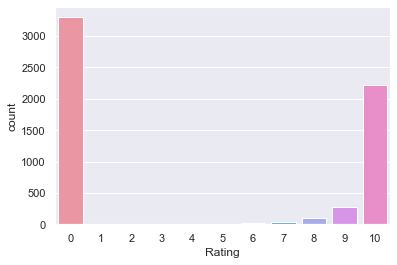

<Figure size 576x576 with 0 Axes>

In [28]:
sns.countplot(df['Rating'])
plt.figure(figsize=(8,8))
plt.show()

* Most of the Doctors got rating "0".Second most is "10". 2000 above doctors got rating 10.

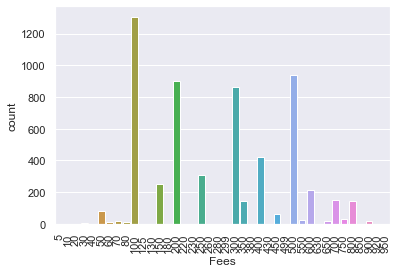

<Figure size 1080x1080 with 0 Axes>

In [29]:
plt.xticks(rotation=90)
sns.set(font_scale=1)
sns.countplot(df['Fees'])
plt.figure(figsize=(15,15))
plt.show()

* The maximum fees the doctor recieving from patients=900
* The minimum fees the doctor recieving from patients=50

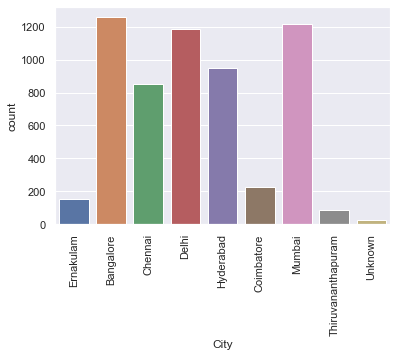

<Figure size 576x576 with 0 Axes>

In [30]:
plt.xticks(rotation=90)
sns.countplot(df['City'])
plt.figure(figsize=(8,8))
plt.show()

### Bivariate Analysis

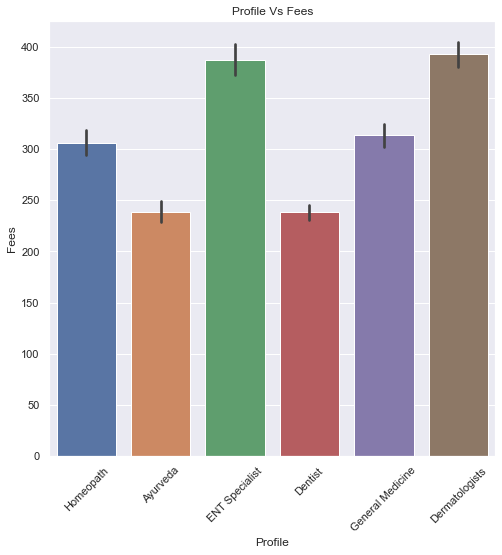

In [31]:
plt.figure(figsize=(8,8))
sns.barplot(x='Profile',y='Fees',data=df)
plt.title('Profile Vs Fees')
plt.xticks(rotation=45)
plt.show()

* Doctors having the profile Dermatologist charging more fees for consultation compared to others.ENT specialist also charge more fees.
* Dentist and Ayurveda doctors charging minimum amount.

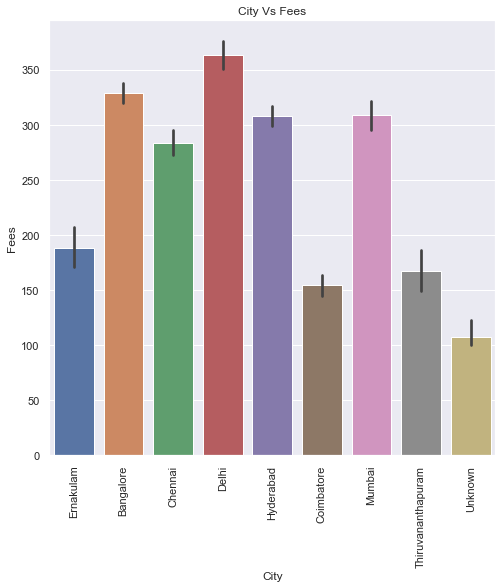

In [32]:
plt.figure(figsize=(8,8))
sns.barplot(x='City',y='Fees',data=df)
plt.title('City Vs Fees')
plt.xticks(rotation=90)
plt.show()

* From the graph it is clear that the big cities like Bangalore,Chennai,Delhi,Hyderabad,Mumbai Doctor's charging high fees as usual.

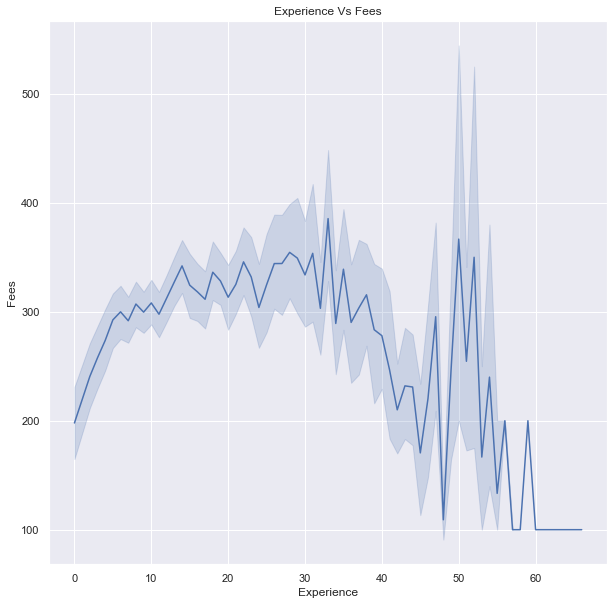

In [33]:
plt.figure(figsize=(10,10))
plt.title('Experience Vs Fees')
ax=sns.lineplot(x='Experience',y='Fees',data=df)
plt.show()

* We can't relate  experience and fees.Up to 30 it is clear that Fees increases with Experience,then fees decreasing again increasing.
  So we can't conclude that Fees increases with Experience of doctor.


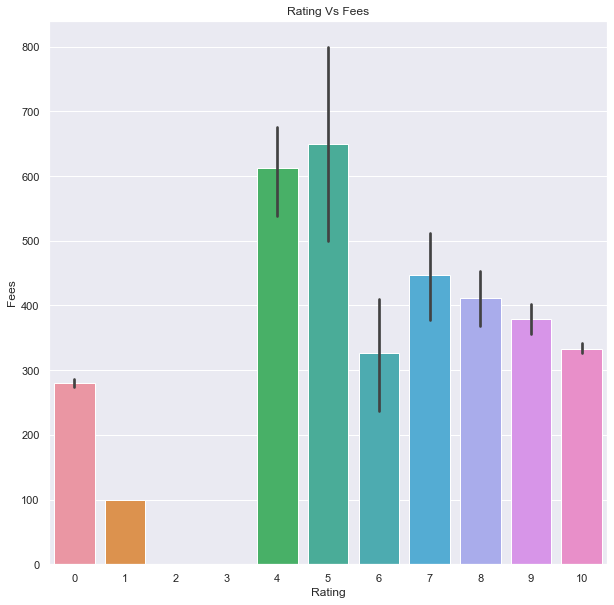

In [34]:
plt.figure(figsize=(10,10))
plt.title('Rating Vs Fees')
sns.barplot(x='Rating',y='Fees',data=df)
plt.show()


* Fees is maximum at the 5 th bin.where rating percentage is 40-49%.So we cant say that patients are giving higher rating for doctors  who charging more fees.But from the 7,8,9,10 bins we can say that patients giving higher rating to those doctors charging less fees,because as fees decreases rating increases.

  When the fees charged high, the percentage of rating is between 30-60%

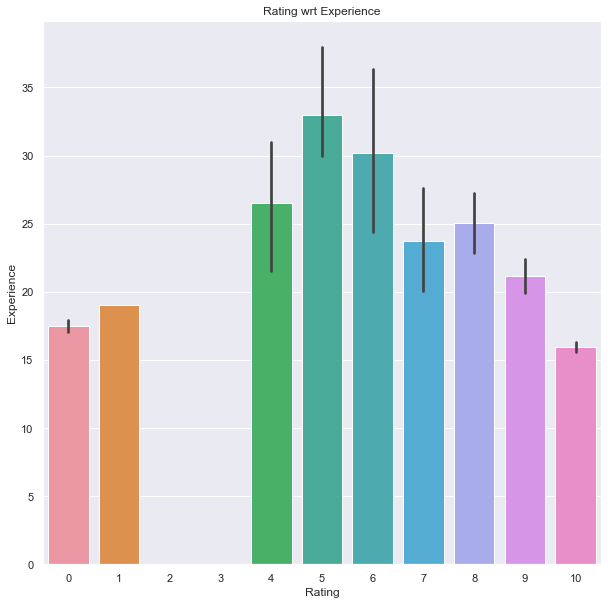

In [35]:
plt.figure(figsize=(10,10))
plt.title('Rating wrt Experience')
sns.barplot(x='Rating',y='Experience',data=df)
plt.show()

* From this we can see that as experience increases rating is not increasing.For more than 30 years experienced doctor the percentage of rating is only 40-59%,where as doctor having less than 20 years experience got rating 10.

  so we can conclude that Experience is not a matter for rating.

### Multivariate Analysis

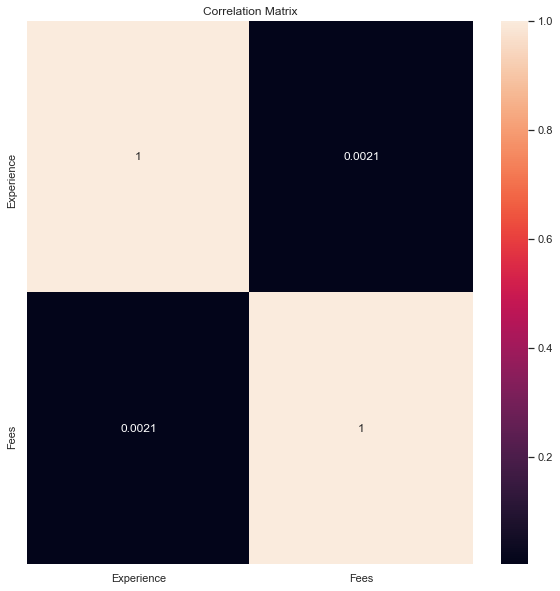

In [36]:
corr_matrix=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation Matrix")
plt.show()

* Experience have lowest correlation with Fees.Qualification  have good correlation with Fees.

In [37]:
df_float=df.select_dtypes(include=[np.number])

### Checking Outliers

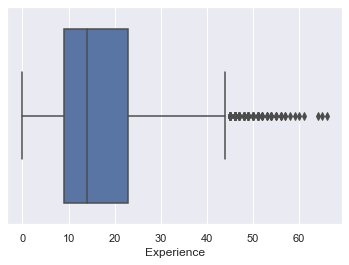

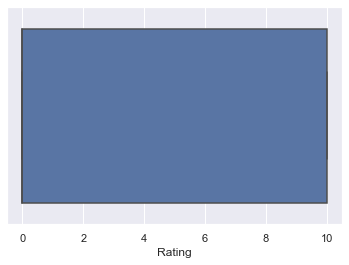

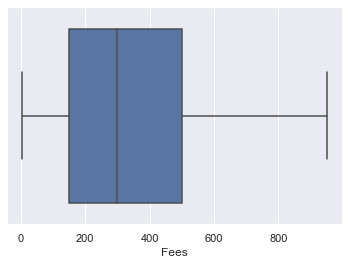

In [38]:
for i in ["Experience","Rating","Fees"]:
    sns.boxplot(df[i])
    plt.show()

There are outliers in the column experience.

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(df_float))
z

array([[0.60097885, 1.08926083],
       [0.47604029, 0.22029544],
       [0.74529508, 0.04161581],
       ...,
       [2.12675597, 1.52985171],
       [0.20678551, 1.08926083],
       [0.02728232, 0.56543832]])

In [40]:
threshold=3
print(np.where(z>3))

(array([ 105,  110,  183,  275,  293,  325,  372,  901,  987, 1009, 1111,
       1314, 1631, 1860, 1981, 2023, 2062, 2165, 2202, 2252, 2262, 2281,
       2393, 2428, 2522, 2623, 2631, 2708, 3180, 3365, 3478, 3493, 3608,
       3942, 3960, 4040, 4167, 4212, 4257, 4344, 4581, 4730, 4763, 4775,
       4835, 5195, 5250, 5265, 5277, 5311, 5410, 5422, 5587, 5637, 5664,
       5720, 5807, 5942], dtype=int64), array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [41]:
df_new=df[(z<3).all(axis=1)]

In [42]:
df_new.shape

(5903, 8)

In [43]:
df=df_new

In [44]:
df.shape

(5903, 8)

In [45]:
df

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City
0,"BHMS, MD - Homeopathy",24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,10,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Basavanagudi,Bangalore
5957,MBBS,33,0,General Medicine,NaN,100,Nungambakkam,Chennai
5958,MBBS,41,10,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Greater Kailash Part 2,Delhi
5959,"MBBS, MD - General Medicine",15,9,General Medicine,General Medical Consultation Viral Fever Treat...,100,Vileparle West,Mumbai


In [46]:
df['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [47]:
df['qualification_count']=df['Qualification'].apply(lambda x:len(x.split(',')))
df['qualification_count'].value_counts()

2     2606
1     1941
3      982
4      256
5       83
6       23
7        6
9        3
8        2
10       1
Name: qualification_count, dtype: int64

Now we are going to extract relevant qualification

In [48]:
df.drop("Qualification",axis=1,inplace=True)

In [49]:
df

,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City,qualification_count
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,2
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,2
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,2
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,2
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,1
...,...,...,...,...,...,...,...,...
5956,19,10,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Basavanagudi,Bangalore,2
5957,33,0,General Medicine,NaN,100,Nungambakkam,Chennai,1
5958,41,10,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Greater Kailash Part 2,Delhi,1
5959,15,9,General Medicine,General Medical Consultation Viral Fever Treat...,100,Vileparle West,Mumbai,2


Now we are going to drop columns with less importance.

In [50]:
#Since Miscellaneous_info column is too much messy and not needed for further analysis,so we are going to drop this column.
#We are also going to drop the column locality.
df.drop('Miscellaneous_Info',axis=1,inplace=True)
df.drop('Locality',axis=1,inplace=True)

In [51]:
# Encoding
df=pd.get_dummies(df,columns=['Profile','City'],prefix=['Profile','City'])

In [52]:
df.head(5)

,Experience,Rating,Fees,qualification_count,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_Unknown
0,24,10,100,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,12,10,350,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,9,0,300,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,12,0,250,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,20,10,250,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [53]:
# Seperating the data into independent and target variable
x=df.drop('Fees',axis=1)
y=df['Fees']

### Distribution of data along columns

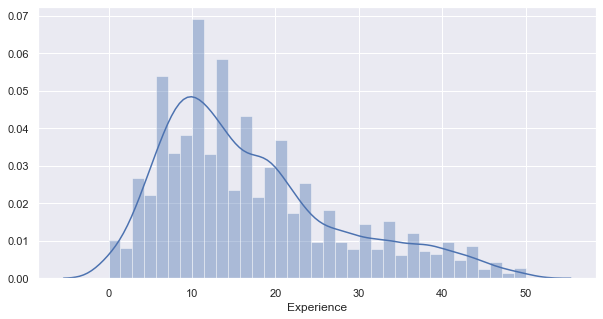

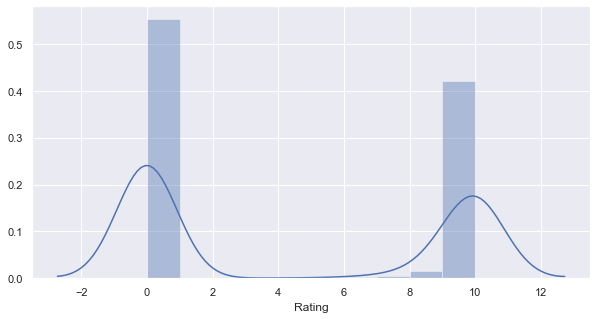

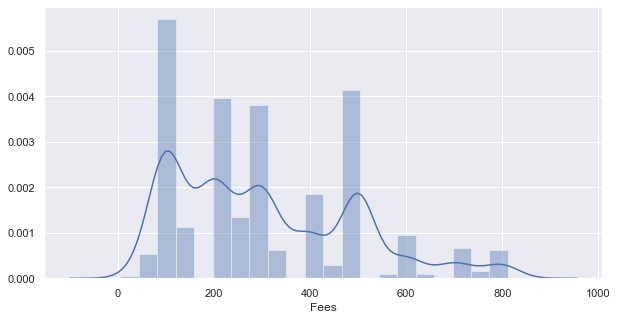

In [54]:
var=['Experience','Rating','Fees']
for i in var:
    plt.figure(figsize=(10,5))
    sns.distplot(df[i])
    plt.show()

* We can see the skewness in the data.

### Checking Skewness

In [55]:
x.skew()

Experience                   0.897661
Rating                       0.234429
qualification_count          1.438239
Profile_Ayurveda             2.166626
Profile_Dentist              1.241682
Profile_Dermatologists       1.718892
Profile_ENT Specialist       2.310896
Profile_General Medicine     1.557957
Profile_Homeopath            2.050262
City_Bangalore               1.407680
City_Chennai                 2.036404
City_Coimbatore              4.849955
City_Delhi                   1.518503
City_Ernakulam               5.990008
City_Hyderabad               1.844159
City_Mumbai                  1.474933
City_Thiruvananthapuram      8.154475
City_Unknown                14.971867
dtype: float64

There is skewness in the column Experience.Remaining all columns are categorical

### Removing Skewness

We are using power transform fumction to remove skewness

In [56]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [57]:
df_new.skew()

Experience                  -0.005040
Rating                       0.214289
qualification_count          0.046249
Profile_Ayurveda             2.166626
Profile_Dentist              1.241682
Profile_Dermatologists       1.718892
Profile_ENT Specialist       2.310896
Profile_General Medicine     1.557957
Profile_Homeopath            2.050262
City_Bangalore               1.407680
City_Chennai                 2.036404
City_Coimbatore              4.849955
City_Delhi                   1.518503
City_Ernakulam               5.990008
City_Hyderabad               1.844159
City_Mumbai                  1.474933
City_Thiruvananthapuram      8.154475
City_Unknown                14.971867
dtype: float64

In [58]:
x=df_new

In [59]:
x

,Experience,Rating,qualification_count,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_Unknown
0,0.764737,1.127013,0.246343,-0.391062,-0.556282,-0.459208,-0.372714,-0.488697,2.456778,-0.519098,-0.409015,-0.198143,-0.496397,6.151059,-0.438228,-0.505130,-0.120871,-0.066513
1,-0.320308,1.127013,0.246343,2.557138,-0.556282,-0.459208,-0.372714,-0.488697,-0.407037,1.926420,-0.409015,-0.198143,-0.496397,-0.162574,-0.438228,-0.505130,-0.120871,-0.066513
2,-0.687451,-0.899512,0.246343,-0.391062,-0.556282,-0.459208,2.683023,-0.488697,-0.407037,1.926420,-0.409015,-0.198143,-0.496397,-0.162574,-0.438228,-0.505130,-0.120871,-0.066513
3,-0.320308,-0.899512,0.246343,2.557138,-0.556282,-0.459208,-0.372714,-0.488697,-0.407037,1.926420,-0.409015,-0.198143,-0.496397,-0.162574,-0.438228,-0.505130,-0.120871,-0.066513
4,0.449495,1.127013,-1.266800,2.557138,-0.556282,-0.459208,-0.372714,-0.488697,-0.407037,-0.519098,2.444901,-0.198143,-0.496397,-0.162574,-0.438228,-0.505130,-0.120871,-0.066513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,0.364836,1.127013,0.246343,-0.391062,-0.556282,-0.459208,2.683023,-0.488697,-0.407037,1.926420,-0.409015,-0.198143,-0.496397,-0.162574,-0.438228,-0.505130,-0.120871,-0.066513
5899,1.372369,-0.899512,-1.266800,-0.391062,-0.556282,-0.459208,-0.372714,2.046258,-0.407037,-0.519098,2.444901,-0.198143,-0.496397,-0.162574,-0.438228,-0.505130,-0.120871,-0.066513
5900,1.831576,1.127013,-1.266800,-0.391062,-0.556282,-0.459208,-0.372714,2.046258,-0.407037,-0.519098,-0.409015,-0.198143,2.014515,-0.162574,-0.438228,-0.505130,-0.120871,-0.066513
5901,-0.003584,1.069116,0.246343,-0.391062,-0.556282,-0.459208,-0.372714,2.046258,-0.407037,-0.519098,-0.409015,-0.198143,-0.496397,-0.162574,-0.438228,1.979689,-0.120871,-0.066513


In [60]:
y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5903, dtype: int64

## Scaling usingStandard Scaler

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [63]:
x

array([[ 0.7647372 ,  1.1270127 ,  0.24634349, ..., -0.50512997,
        -0.12087114, -0.06651335],
       [-0.3203077 ,  1.1270127 ,  0.24634349, ..., -0.50512997,
        -0.12087114, -0.06651335],
       [-0.68745117, -0.89951222,  0.24634349, ..., -0.50512997,
        -0.12087114, -0.06651335],
       ...,
       [ 1.83157636,  1.1270127 , -1.26679959, ..., -0.50512997,
        -0.12087114, -0.06651335],
       [-0.00358446,  1.0691156 ,  0.24634349, ...,  1.97968853,
        -0.12087114, -0.06651335],
       [ 0.18711403,  1.1270127 ,  0.24634349, ..., -0.50512997,
        -0.12087114, -0.06651335]])

## Finding the Best Random State

In [64]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    rsc=r2_score(y_test,pred_test)
    if rsc>maxAccu:
        maxAccu=rsc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)        

Best accuracy is 0.23029988855381722 on Random_state 34


## Train-Test-Split

In [65]:
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((4722, 18), (1181, 18), (1181,), (4722,))

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=34)

In [67]:
LR=LinearRegression()

In [68]:

LR.fit(x_train,y_train)
LR.score(x_train,y_train)
predLR=LR.predict(x_test)
print('Accuracy Score:',r2_score(y_test,predLR))
print('mse:',mean_squared_error(y_test,predLR))
print('mae:',mean_absolute_error(y_test,predLR))

Accuracy Score: 0.23029988855381722
mse: 26907.51730359893
mae: 130.14003227208795


In [69]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print('Accuracy Score:',r2_score(y_test,preddt))
print('mse:',mean_squared_error(y_test,preddt))
print('mae:',mean_absolute_error(y_test,preddt))

Accuracy Score: -0.44141410257424507
mse: 50389.592426842006
mae: 166.3327923605231


In [70]:
sv=SVR()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print('Accuracy Score:',r2_score(y_test,predsv))
print('mse:',mean_squared_error(y_test,predsv))
print('mae:',mean_absolute_error(y_test,predsv))

Accuracy Score: 0.14550133637765095
mse: 29871.942637659526
mae: 134.44936308107464


In [71]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
knr.score(x_train,y_train)
predknr=knr.predict(x_test)
print('Accuracy Score:',r2_score(y_test,predknr))
print('mse:',mean_squared_error(y_test,predknr))
print('mae:',mean_absolute_error(y_test,predknr))

Accuracy Score: 0.12238072180529791
mse: 30680.203319220996
mae: 133.63878069432684


In [72]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy Score:',r2_score(y_test,predrf))
print('mse:',mean_squared_error(y_test,predrf))
print('mae:',mean_absolute_error(y_test,predrf))

Accuracy Score: 0.026365640348676722
mse: 34036.74105032036
mae: 139.78743049369265


In [73]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb.score(x_train,y_train)
predgb=gb.predict(x_test)
print('Accuracy Score:',r2_score(y_test,predgb))
print('mse:',mean_squared_error(y_test,predgb))
print('mae:',mean_absolute_error(y_test,predgb))
print('\n')


Accuracy Score: 0.2567980410667332
mse: 25981.18315520568
mae: 127.33834803885021




## Cross Validation

In [74]:
scr=cross_val_score(LR,x,y,cv=5)
print('Score',scr)
print('Cross validation score',scr.mean())
print('Standard deviation',scr.std())

Score [0.19304002 0.17054642 0.19970413 0.16174962 0.18366062]
Cross validation score 0.18174016305631302
Standard deviation 0.013992860435158717


In [75]:
scr=cross_val_score(dt,x,y,cv=5)
print('Score',scr)
print('Cross validation score',scr.mean())
print('Standard deviation',scr.std())

Score [-0.42163877 -0.41289518 -0.30998206 -0.39018674 -0.41574052]
Cross validation score -0.3900886546485566
Standard deviation 0.04145031126600456


In [76]:
scr=cross_val_score(sv,x,y,cv=5)
print('Score',scr)
print('Cross validation score',scr.mean())
print('Standard deviation',scr.std())

Score [0.13836297 0.09387884 0.13246119 0.09438676 0.12041986]
Cross validation score 0.1159019267371592
Standard deviation 0.018692449220563755


In [77]:
scr=cross_val_score(knr,x,y,cv=5)
print('Score',scr)
print('Cross validation score',scr.mean())
print('Standard deviation',scr.std())

Score [0.01273518 0.05586932 0.09155684 0.03181541 0.0721976 ]
Cross validation score 0.052834870470050796
Standard deviation 0.028047521115729834


In [78]:
scr=cross_val_score(rf,x,y,cv=5)
print('Score',scr)
print('Cross validation score',scr.mean())
print('Standard deviation',scr.std())

Score [-0.03149093  0.03503679  0.05153896  0.01215673 -0.01194946]
Cross validation score 0.011058415792247889
Standard deviation 0.030181625697737607


In [79]:
scr=cross_val_score(gb,x,y,cv=5)
print('Score',scr)
print('Cross validation score',scr.mean())
print('Standard deviation',scr.std())

Score [0.20003642 0.19113707 0.22887335 0.18738172 0.1958461 ]
Cross validation score 0.20065493187305883
Standard deviation 0.014741468308974607


Our best model is GradientBoostingRegressor.

## Regularization

In [80]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':range(0,10)}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)  

{'alpha': 0.1, 'random_state': 0}


In [81]:
ls=Lasso(alpha=.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.2307594383227176

In [82]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
print('cross validation score',cv_mean)

cross validation score 0.18201924467865213


## Hyperparameter Tuning

In [83]:
#Creating parameter list to pass in GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[1,10],'n_estimators':[1,100],'loss':['ls', 'lad', 'huber', 'quantile'] }

In [84]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [85]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_depth': [1, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 100]})

In [86]:
GCV.best_params_

{'criterion': 'mse',
 'loss': 'ls',
 'max_depth': 1,
 'max_features': 'log2',
 'n_estimators': 100}

In [87]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [88]:
r2_score(y_test,GCV_pred)

0.21546360000482645

## Saving the best model

In [89]:
#Saving Model
import pickle
filename="Dr_fee_prediction.pkl"
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

## Using the Test dataset

In [90]:
df1=pd.read_excel('Final_Test.xlsx')
df1

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [92]:
df1.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [93]:
#statistical summary
df1.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,1987,1987,897,1981,1987,1153
unique,630,57,36,592,6,1084
top,BAMS,10 years experience,100%,"Andheri West, Mumbai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...
freq,153,110,223,27,444,10


In [94]:
#Dimension of the dataset
df1.shape

(1987, 6)

In [95]:
#Checking the null values of the dataset
df1.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

There are 1090 null values in the dataset Rating.6 null values are there in the column Place,the column Miscellaneous_info contains 834 null values.

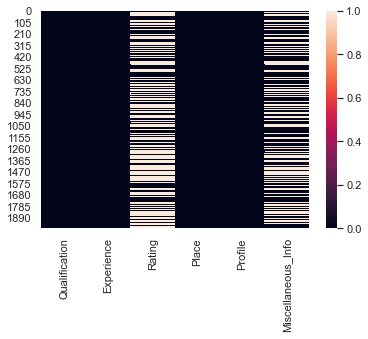

In [96]:
sns.heatmap(df1.isnull())

## EDA

Now we are going to extract years of experience from the column Experienceand converting to numeric.

In [97]:
df1['Experience']=df1['Experience'].str.split().str[0]
df1['Experience']=df1['Experience'].astype(int)

In [98]:
df1.head(3)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"


Now we are going to replace the null values in the column 'Place'.

In [99]:
df1['Place'].fillna('Unknown,Unknown',inplace=True)

In [100]:
#Dividing the column Place into Locality and City
df1['Locality']=df1['Place'].str.split(',').str[0]
df1['City']=df1['Place'].str.split(',').str[1]

#Remove the column Place
df1.drop('Place',axis=1,inplace=True)

# Replacing null values from  the column Rating
df1['Rating'].fillna('-99%',inplace=True)

# convert Rating  from object to numeric
df1['Rating']=df1['Rating'].str.slice(stop=-1).astype(int)



In [101]:
print("0-9%",len(df1[(df1['Rating']>0) & (df1['Rating']<10)]))
print("10-19%",len(df1[(df1['Rating']>=10) & (df1['Rating']<20)]))
print("20-29%",len(df1[(df1['Rating']>=20) & (df1['Rating']<30)]))
print("30-39%",len(df1[(df1['Rating']>=30) & (df1['Rating']<40)]))
print("40-49%",len(df1[(df1['Rating']>=40) & (df1['Rating']<50)]))
print("50-59%",len(df1[(df1['Rating']>=50) & (df1['Rating']<60)]))
print("And so on...")

# Creating bins of size of 10

bins=[-99,0,10,20,30,40,50,60,70,80,90,100]
labels=[i for i in range(11)]
df1['Rating']=pd.cut(df1['Rating'],bins=bins,labels=labels,include_lowest=True)


0-9% 0
10-19% 0
20-29% 0
30-39% 0
40-49% 0
50-59% 5
And so on...


In [102]:
df1['City'].unique()

array([' Mumbai', ' Hyderabad', ' Chennai', ' Delhi', ' Bangalore',
       ' Coimbatore', ' Thiruvananthapuram', ' Ernakulam', 'Unknown'],
      dtype=object)

In [103]:
df1['City'].value_counts()

 Bangalore             420
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
Unknown                  6
Name: City, dtype: int64

In [104]:
import re
df1['City']=df1['City'].apply(lambda x: re.sub(' +','',str(x)))

In [105]:
df1

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Locality,City
0,MBBS,35,0,General Medicine,NaN,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,ENT Specialist,NaN,West Marredpally,Hyderabad
2,"MBBS, DDVL",40,7,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai
3,BAMS,0,0,Ayurveda,NaN,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,10,Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore
...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,0,Ayurveda,NaN,Basavanagudi,Bangalore
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,0,Dermatologists,NaN,Choolai,Chennai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,0,General Medicine,NaN,Porur,Chennai
1985,BDS,12,10,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,Arekere,Bangalore


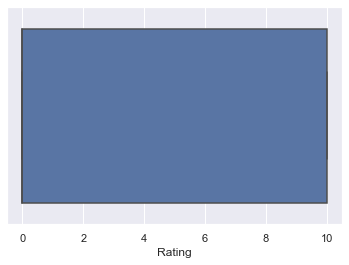

In [106]:
sns.boxplot(df1['Rating'])

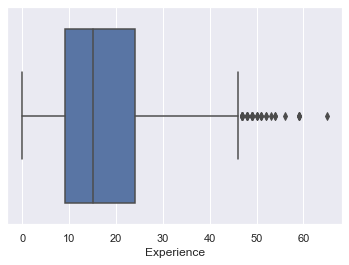

In [107]:
sns.boxplot(df1['Experience'])

In [108]:
df1_float=df1.select_dtypes(include=[np.number])

#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(df1_float))
z

threshold=3
print(np.where(z>3))
df1_new=df1[(z<3).all(axis=1)]
df1=df1_new

(array([ 104,  258,  264,  398,  617,  641,  992, 1246, 1284, 1297, 1337],
      dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [109]:
df1.head(2)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Locality,City
0,MBBS,35,0,General Medicine,NaN,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,ENT Specialist,NaN,West Marredpally,Hyderabad


In [110]:
#Finding Qualification count of each doctors
df1['qualification_count']=df1['Qualification'].apply(lambda x:len(x.split(',')))
df1['qualification_count'].value_counts()

2     885
1     606
3     363
4      86
5      28
6       5
17      1
9       1
7       1
Name: qualification_count, dtype: int64

In [111]:
df1.drop('Qualification',axis=1,inplace=True)
df1.drop('Miscellaneous_Info',axis=1,inplace=True)
df1.drop('Locality',axis=1,inplace=True)

In [112]:
# Encoding
df1=pd.get_dummies(df1,columns=['Profile','City'],prefix=['Profile','City'])

In [113]:
#Checking skewness
df1.skew()

Experience                   0.873380
Rating                       0.220212
qualification_count          2.695927
Profile_Ayurveda             2.248671
Profile_Dentist              1.334192
Profile_Dermatologists       1.753220
Profile_ENT Specialist       2.378836
Profile_General Medicine     1.334192
Profile_Homeopath            2.074402
City_Bangalore               1.406303
City_Chennai                 2.032699
City_Coimbatore              5.070788
City_Delhi                   1.436201
City_Ernakulam               6.184628
City_Hyderabad               1.777231
City_Mumbai                  1.529925
City_Thiruvananthapuram     10.649701
City_Unknown                18.078509
dtype: float64

In [114]:
#removing Skewness
from sklearn.preprocessing import power_transform
df1_new=power_transform(df1)
df1_new=pd.DataFrame(df1_new,columns=df1.columns)

df1=df1_new
df1

,Experience,Rating,qualification_count,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_Unknown
0,1.432105,-0.905766,-1.315926,-0.380583,-0.535218,-0.453446,-0.364729,1.868397,-0.403779,-0.519541,-0.409693,-0.190217,-0.513252,-0.157786,-0.449385,2.023063,-0.093155,-0.055188
1,1.185222,-0.905766,0.188629,-0.380583,-0.535218,-0.453446,2.741759,-0.535218,-0.403779,-0.519541,-0.409693,-0.190217,-0.513252,-0.157786,2.225266,-0.494300,-0.093155,-0.055188
2,1.717909,0.916297,0.188629,-0.380583,-0.535218,2.205335,-0.364729,-0.535218,-0.403779,-0.519541,2.440850,-0.190217,-0.513252,-0.157786,-0.449385,-0.494300,-0.093155,-0.055188
3,-2.754710,-0.905766,-1.315926,2.627546,-0.535218,-0.453446,-0.364729,-0.535218,-0.403779,-0.519541,-0.409693,-0.190217,1.948363,-0.157786,-0.449385,-0.494300,-0.093155,-0.055188
4,0.033508,1.119882,0.188629,-0.380583,1.868397,-0.453446,-0.364729,-0.535218,-0.403779,1.924776,-0.409693,-0.190217,-0.513252,-0.157786,-0.449385,-0.494300,-0.093155,-0.055188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,-0.612235,-0.905766,0.188629,2.627546,-0.535218,-0.453446,-0.364729,-0.535218,-0.403779,1.924776,-0.409693,-0.190217,-0.513252,-0.157786,-0.449385,-0.494300,-0.093155,-0.055188
1972,-1.540750,-0.905766,1.096547,-0.380583,-0.535218,2.205335,-0.364729,-0.535218,-0.403779,-0.519541,2.440850,-0.190217,-0.513252,-0.157786,-0.449385,-0.494300,-0.093155,-0.055188
1973,-0.739867,-0.905766,0.188629,-0.380583,-0.535218,-0.453446,-0.364729,1.868397,-0.403779,-0.519541,2.440850,-0.190217,-0.513252,-0.157786,-0.449385,-0.494300,-0.093155,-0.055188
1974,-0.377022,1.119882,-1.315926,-0.380583,1.868397,-0.453446,-0.364729,-0.535218,-0.403779,1.924776,-0.409693,-0.190217,-0.513252,-0.157786,-0.449385,-0.494300,-0.093155,-0.055188


In [115]:
#Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1=ss.fit_transform(df1)

In [116]:
#load the model
fitted_model=pickle.load(open('Dr_fee_prediction.pkl','rb'))

In [117]:
fitted_model

GradientBoostingRegressor(criterion='mse', max_depth=1, max_features='log2')

In [118]:
#prediction over the test data
predictions=fitted_model.predict(df1)

In [119]:
predictions

array([267.11537521, 349.45815296, 357.34689281, ..., 315.31357369,
       237.83949969, 353.46994029])

In [120]:
def rounding(x):
    m=(x//50)*50
    if m==x:
        return int(x/1.0)
    elif x-m>=25.0:
        return int((m+50)/1.0)
    else:
        return int(m/1.0)

In [121]:
final_test=[]
for i in range(len(predictions)):
    final_test.append(rounding(predictions[i]))
final_test=pd.DataFrame({'Fees':final_test})
print(final_test.head())

   Fees
0   250
1   350
2   350
3   250
4   300
